# This notebook calculates return levels and generates conditional exceedance probabilities and visualizes them
##### Author: Omid Emamjomehzadeh (https://www.omidemam.com/)
##### Supervisor: Dr. Omar Wani (https://engineering.nyu.edu/faculty/omar-wani)
##### Hydrologic Systems Group @NYU (https://www.omarwani.com/)

In [326]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import matplotlib.cm as cm
import re
import matplotlib.colors as mcolors
import os
import glob
import geopandas as gpd
import folium
from tqdm import tqdm
import random
from branca.element import Template, MacroElement
from folium.raster_layers import VideoOverlay
from branca.element import Element
import datetime

In [327]:
import warnings
# Suppress the specific RuntimeWarning
warnings.filterwarnings("ignore")
# Suppress all UserWarnings, including PerformanceWarnings
warnings.simplefilter('ignore', category=UserWarning)
# font of the plots
plt.rcParams['font.family'] = 'Arial'

In [328]:
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_UL_LL.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_wet_dry.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100_future_rainandQ.xlsx'
excel_output_file = r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_hydrq_hydoq_2030_2100_future_rain_LU_Q.xlsx'
merged_culvert=pd.read_excel(excel_output_file)

In [331]:
%%time
# calculate the return periods and their class
def assign_return_period(row):
    if row['Q'] < row['Q_2']:
        return pd.Series([2, '0-2'])
    elif row['Q'] < row['Q_5']:
        return pd.Series([5, '2-5'])
    elif row['Q'] < row['Q_10']:
        return pd.Series([10, '5-10'])
    elif row['Q'] < row['Q_25']:
        return pd.Series([25, '10-25'])
    elif row['Q'] < row['Q_50']:
        return pd.Series([50, '25-50'])
    elif row['Q'] < row['Q_100']:
        return pd.Series([100, '50-100'])
    elif row['Q'] < row['Q_200']:
        return pd.Series([200, '100-200'])
    elif row['Q'] < row['Q_500']:
        return pd.Series([500, '200-500'])
    elif row['Q'] < row['Q_1000']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])

def assign_return_period_c(row):
    if row['average_Q_maxhw'] < row['Q_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_200']:
        return pd.Series([200, '100-200'])
    elif row['average_Q_maxhw'] < row['Q_500']:
        return pd.Series([500, '200-500'])
    elif row['average_Q_maxhw'] < row['Q_1000']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])
        
def assign_return_period_c_LL(row):
    if row['average_Q_maxhw'] < row['Q_LL_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_LL_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_LL_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_LL_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_LL_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_LL_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_LL_200']:
        return pd.Series([200, '100-200'])
    elif row['average_Q_maxhw'] < row['Q_LL_500']:
        return pd.Series([500, '200-500'])
    elif row['average_Q_maxhw'] < row['Q_LL_1000']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])

def assign_return_period_c_UL(row):
    if row['average_Q_maxhw'] < row['Q_UL_2']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row['Q_UL_5']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row['Q_UL_10']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row['Q_UL_25']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row['Q_UL_50']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row['Q_UL_100']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row['Q_UL_200']:
        return pd.Series([200, '100-200'])
    elif row['average_Q_maxhw'] < row['Q_UL_500']:
        return pd.Series([500, '200-500'])
    elif row['average_Q_maxhw'] < row['Q_UL_1000']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])
        
def assign_return_period_c_condition(row, condition):
    q_val = row['average_Q_maxhw']
    # Build the appropriate Q column names dynamically
    if q_val < row[f'Q_2_{condition}']:
        return pd.Series([2, '0-2'])
    elif q_val < row[f'Q_5_{condition}']:
        return pd.Series([5, '2-5'])
    elif q_val < row[f'Q_10_{condition}']:
        return pd.Series([10, '5-10'])
    elif q_val < row[f'Q_25_{condition}']:
        return pd.Series([25, '10-25'])
    elif q_val < row[f'Q_50_{condition}']:
        return pd.Series([50, '25-50'])
    elif q_val < row[f'Q_100_{condition}']:
        return pd.Series([100, '50-100'])
    elif q_val < row[f'Q_200_{condition}']:
        return pd.Series([200, '100-200'])
    elif q_val < row[f'Q_500_{condition}']:
        return pd.Series([500, '200-500'])
    elif q_val < row[f'Q_1000_{condition}']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])
        
def assign_return_period_c_future_LU (row, year, secnario):
    q_val = row['average_Q_maxhw']
    if row['average_Q_maxhw'] < row[f'Q_2_{year}_{secnario}_Wet']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row[f'Q_5_{year}_{secnario}_Wet']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row[f'Q_10_{year}_{secnario}_Wet']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row[f'Q_25_{year}_{secnario}_Wet']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row[f'Q_50_{year}_{secnario}_Wet']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row[f'Q_100_{year}_{secnario}_Wet']:
        return pd.Series([100, '50-100'])
    elif row['average_Q_maxhw'] < row[f'Q_200_{year}_{secnario}_Wet']:
        return pd.Series([200, '100-200'])
    elif row['average_Q_maxhw'] < row[f'Q_500_{year}_{secnario}_Wet']:
        return pd.Series([500, '200-500'])
    elif row['average_Q_maxhw'] < row[f'Q_1000_{year}_{secnario}_Wet']:
        return pd.Series([1000, '500-1000'])
    else:
        return pd.Series([2000, '1000-$∞$'])  

def assign_return_period_c_future_rain (row, year, secnario):
    q_val = row['average_Q_maxhw']
    if row['average_Q_maxhw'] < row[f'Q_2_{time}_{scenario}']:
        return pd.Series([2, '0-2'])
    elif row['average_Q_maxhw'] < row[f'Q_5_{time}_{scenario}']:
        return pd.Series([5, '2-5'])
    elif row['average_Q_maxhw'] < row[f'Q_10_{time}_{scenario}']:
        return pd.Series([10, '5-10'])
    elif row['average_Q_maxhw'] < row[f'Q_25_{time}_{scenario}']:
        return pd.Series([25, '10-25'])
    elif row['average_Q_maxhw'] < row[f'Q_50_{time}_{scenario}']:
        return pd.Series([50, '25-50'])
    elif row['average_Q_maxhw'] < row[f'Q_100_{time}_{scenario}']:
        return pd.Series([100, '50-100'])
    else:
        return pd.Series([200, '100-$∞$']) 


def assign_return_period_c_future_rain_LL(row, year, scenario):
    # Convert A2/B2 to rcp85/rcp45
    rcp = 'rcp85' if scenario == 'A2' else 'rcp45'
    q_val = row['average_Q_maxhw']
    
    if q_val < row[f'Q_2_{year}_{scenario}_Wet_fr']:
        return pd.Series([2, '0-2'])
    elif q_val < row[f'Q_5_{year}_{scenario}_Wet_fr']:
        return pd.Series([5, '2-5'])
    elif q_val < row[f'Q_10_{year}_{scenario}_Wet_fr']:
        return pd.Series([10, '5-10'])
    elif q_val < row[f'Q_25_{year}_{scenario}_Wet_fr']:
        return pd.Series([25, '10-25'])
    elif q_val < row[f'Q_50_{year}_{scenario}_Wet_fr']:
        return pd.Series([50, '25-50'])
    elif q_val < row[f'Q_100_{year}_{scenario}_Wet_fr']:
        return pd.Series([100, '50-100'])
    else:
        return pd.Series([200, '100-$∞$'])  
               
# Apply the function
merged_culvert[['RP', 'RP_class']] = merged_culvert.apply(assign_return_period, axis=1)
merged_culvert[['RP_c', 'RP_class_c']] = merged_culvert.apply(assign_return_period_c, axis=1)
merged_culvert[['RP_c_LL', 'RP_class_c_LL']] = merged_culvert.apply(assign_return_period_c_UL, axis=1)
merged_culvert[['RP_c_UL', 'RP_class_c_UL']] = merged_culvert.apply(assign_return_period_c_LL, axis=1)
merged_culvert[['RP_c_dry', 'RP_class_c_dry']] = merged_culvert.apply(lambda row: assign_return_period_c_condition(row, 'dry'), axis=1)
merged_culvert[['RP_c_nor', 'RP_class_c_nor']] = merged_culvert.apply(lambda row: assign_return_period_c_condition(row, 'nor'), axis=1)
# 
for year in [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]:
    for secnario in ['A1B', 'A2', 'B1', 'B2']:
        merged_culvert[[f'RP_c_{year}_{secnario}', f'RP_class_c_{year}_{secnario}']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_LU (row, year, secnario), axis=1)
#
for time in ['2010-2039','2040-2069','2070-2099']:
    for scenario in ['rcp45','rcp85']:
        merged_culvert[[f'RP_c_{time}_{scenario}', f'RP_class_c_{time}_{scenario}']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_rain (row, time, secnario), axis=1)
#
for year in [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]:
    for secnario in ['A2', 'B2']:
        merged_culvert[[f'RP_c_{year}_{secnario}_lr', f'RP_class_c_{year}_{secnario}_lr']] = \
            merged_culvert.apply(lambda row: assign_return_period_c_future_rain_LL (row, year, secnario), axis=1)

CPU times: total: 29 s
Wall time: 31.4 s


# RP

## Histogram

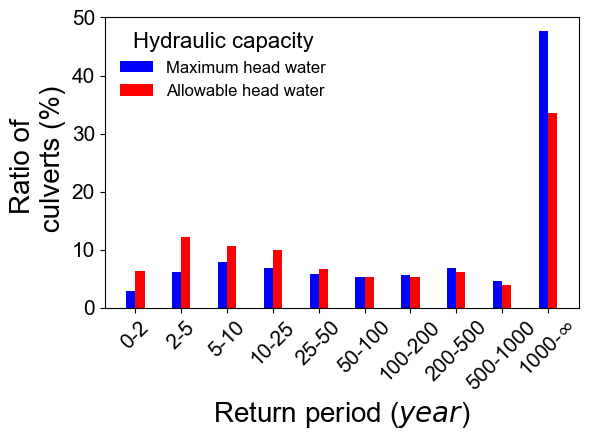

In [332]:
# Define ordered class labels
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100', '100-200', '200-500', '500-1000', '1000-$∞$']
# Convert RP_class and RP_class_c to ordered categorical
merged_culvert['RP_class'] = pd.Categorical(merged_culvert['RP_class'], categories=ordered_classes, ordered=True)
merged_culvert['RP_class_c'] = pd.Categorical(merged_culvert['RP_class_c'], categories=ordered_classes, ordered=True)
# Count occurrences for each category
counts_rp = merged_culvert['RP_class'].value_counts().reindex(ordered_classes).fillna(0)
counts_rp_c = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
# Convert to percentage
total = len(merged_culvert)
percent_rp = (counts_rp / total) * 100
percent_rp_c = (counts_rp_c / total) * 100
# figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Bar positions
x = np.arange(len(ordered_classes))
bar_width = 0.2
# Plot side-by-side bars
bars_rp = ax.bar(x - bar_width / 2, percent_rp, width=bar_width, color='blue', alpha=1, label='Maximum head water')
bars_rp_c = ax.bar(x + bar_width / 2, percent_rp_c, width=bar_width, color='red', alpha=1, label='Allowable head water')
# Labels and formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
# Add legend
ax.legend(title='Hydraulic capacity', title_fontsize=16, fontsize=12, loc='upper left', frameon=False)
# Layout
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_criteria.png", dpi=300, bbox_inches='tight')
plt.show()

## Map

In [333]:
# merge with shapefile
culvert1 = gpd.read_file(r'D:\culvert repo\Results\Peak hydrologic discharge\culvert_CN_tc.shp')
#culvert1.columns
gdf = merged_culvert.merge(culvert1[['BIN','geometry']], on='BIN', how='inner')

In [334]:
# Gdf has'Ini_lat' and 'Ini_lon' columns
geometry = [Point(xy) for xy in zip(gdf['Ini_lon'], gdf['Ini_lat'])]
gdf = gpd.GeoDataFrame(gdf, geometry=geometry, crs='EPSG:4326')
gdf1=gdf

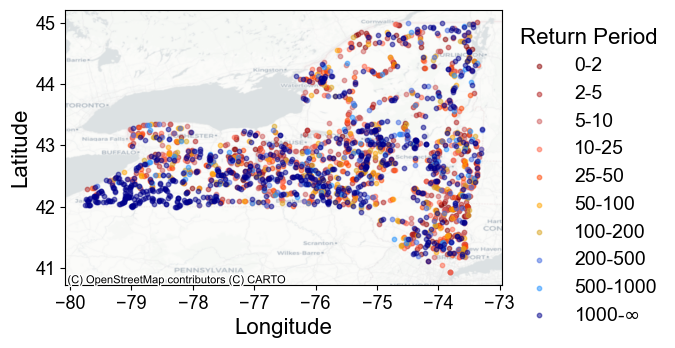

In [335]:
# Reproject GeoDataFrame for basemap
gdf = gdf1.to_crs(epsg=4326)
class_colors = {
    '0-2': 'darkred',
    '2-5': 'firebrick',
    '5-10': 'indianred',
    '10-25': 'tomato',
    '25-50': 'orangered',
    '50-100': 'orange',
    '100-200': 'goldenrod',
    '200-500': 'royalblue',
    '500-1000': 'dodgerblue',
    '1000-$∞$': 'darkblue'
}
# Create figure
fig, ax = plt.subplots(figsize=(7, 5))
fig.patch.set_facecolor('white')
# Plot each return period class
for rp_class in ordered_classes:
    subset = gdf[gdf['RP_class_c'] == rp_class]
    if subset.empty:
        continue
    color = class_colors[rp_class]
    subset.plot(ax=ax, marker='o', color=color, markersize=10, label=rp_class, alpha=0.5)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Format legend and axes
plt.legend(
    title="Return Period",
    fontsize=14,
    title_fontsize=16,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=False
)
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
# Layout and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_return_periods_map_class.png', dpi=300, bbox_inches='tight')
plt.show()

# Uncertainty bounds

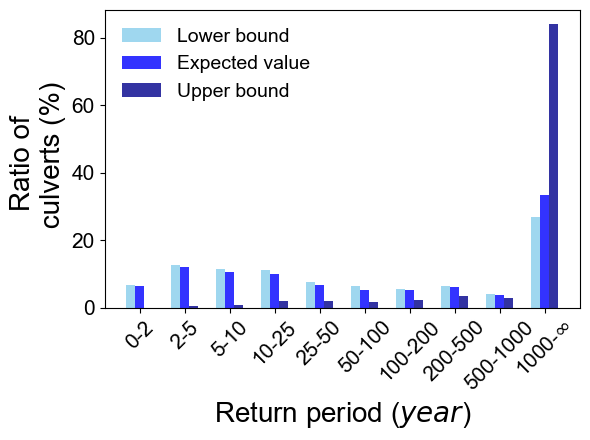

In [336]:
# Convert all class columns to ordered categorical
for col in ['RP_class_c', 'RP_class_c_LL', 'RP_class_c_UL']:
    merged_culvert[col] = pd.Categorical(merged_culvert[col], categories=ordered_classes, ordered=True)
# Compute percentage counts
total = len(merged_culvert)
percent_c = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
percent_c_LL = merged_culvert['RP_class_c_LL'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
percent_c_UL = merged_culvert['RP_class_c_UL'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
# Bar positions
x = np.arange(len(ordered_classes))
bar_width = 0.2
# Create plot
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Plot bars
ax.bar(x - bar_width, percent_c_LL, width=bar_width, label='Lower bound', color='skyblue', alpha=0.8)
ax.bar(x, percent_c, width=bar_width, label='Expected value', color='blue', alpha=0.8)
ax.bar(x + bar_width, percent_c_UL, width=bar_width, label='Upper bound', color='darkblue', alpha=0.8)
# Axis and label formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
# Legend
ax.legend(fontsize=14, loc='upper left', frameon=False)
# Layout adjustment
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_Uncertainty_bounds.png", dpi=300, bbox_inches='tight')
plt.show()


# ASM

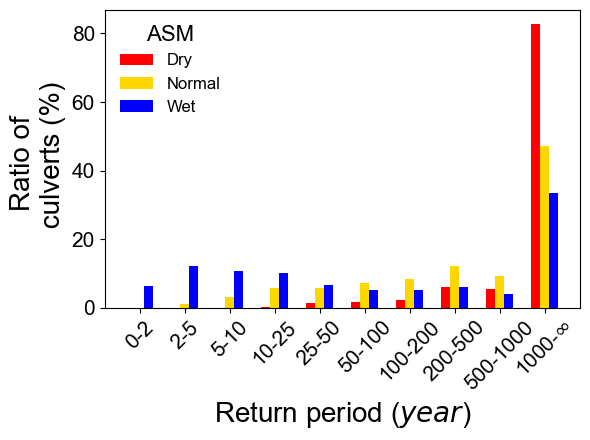

In [337]:
# Convert class columns to ordered categorical
for col in ['RP_class_c', 'RP_class_c_nor', 'RP_class_c_dry']:
    merged_culvert[col] = pd.Categorical(merged_culvert[col], categories=ordered_classes, ordered=True)
# Total number of culverts
total = len(merged_culvert)
# Compute percentage counts for each class column
percent_c = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
percent_c_nor = merged_culvert['RP_class_c_nor'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
percent_c_dry = merged_culvert['RP_class_c_dry'].value_counts().reindex(ordered_classes).fillna(0) / total * 100
# X-axis setup
x = np.arange(len(ordered_classes))
bar_width = 0.2
# Create the figure
fig, ax = plt.subplots(figsize=(6, 4.5))
fig.patch.set_facecolor('white')
# Plot each bar group
ax.bar(x - bar_width, percent_c_dry, width=bar_width, label='Dry', color='red')
ax.bar(x, percent_c_nor, width=bar_width, label='Normal', color='gold')
ax.bar(x + bar_width, percent_c, width=bar_width, label='Wet', color='blue')
# Formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(title='ASM',title_fontsize=16, fontsize=12, loc='upper left', frameon=False)
# Final layout adjustment
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_ASM.png", dpi=300, bbox_inches='tight')
plt.show()

# Future

## Landuse

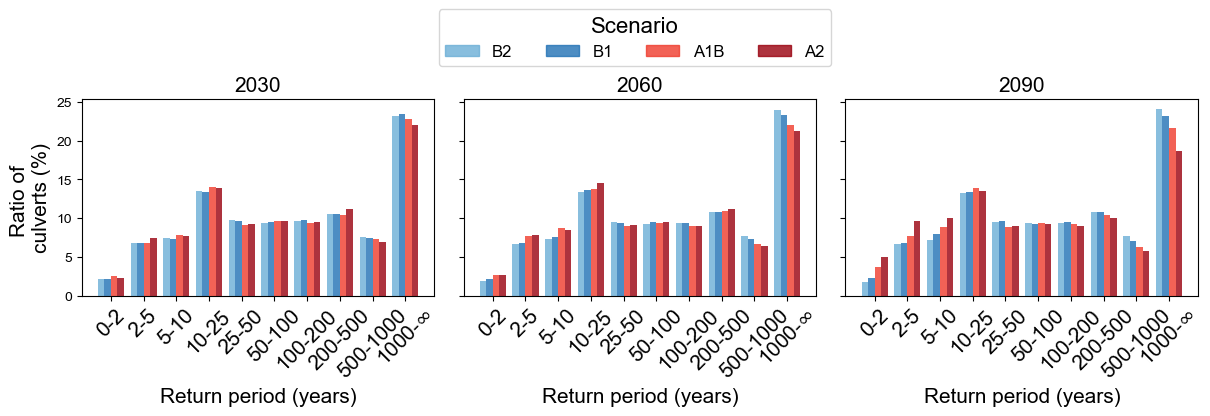

In [338]:
# Ordered return period classes
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100', 
                   '100-200', '200-500', '500-1000', '1000-$∞$']
# Custom labels for x-axis (you can also just reuse ordered_classes if they’re final)
custom_labels = ordered_classes
# Define year and scenario list
years = [2030,2060,2090]
scenarios = ['B2', 'B1', 'A1B', 'A2']
# Define colors for the scenarios (light to dark)
palette = ['#6baed6', '#2171b5', '#ef3b2c', '#99000d']
scenario_labels = ['B2', 'B1', 'A1B', 'A2']
# Function to compute percentage distribution for a given year
def get_percentages_for_year(year):
    columns = [f'RP_class_c_{year}_{sc}' for sc in scenarios]
    counts = [merged_culvert[col].value_counts().reindex(ordered_classes, fill_value=0) for col in columns]
    percentages = [(c / c.sum()) * 100 for c in counts]
    return percentages
# Set up the subplots
ncols = 4
nrows = int(np.ceil(len(years) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(4 * ncols, 4 * nrows), sharey=True)
fig.patch.set_facecolor('white')

bar_width = 0.2
x = np.arange(len(ordered_classes))
# Plotting function
def plot_bars(ax, percentages, title):
    for i, (percent, color, label) in enumerate(zip(percentages, palette, scenario_labels)):
        ax.bar(x - 1.5 * bar_width + i * bar_width, percent, width=bar_width, label=label, color=color, alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(custom_labels, rotation=45, ha='center', fontsize=15)
    ax.set_xlabel('Return period (years)', fontsize=15)
    ax.set_title(title, fontsize=15)
# Loop through years and plot each
for idx, year in enumerate(years):
    row = idx // ncols
    col = idx % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]
    percentages = get_percentages_for_year(year)
    plot_bars(ax, percentages, f'{year}')
    if col == 0:
        ax.set_ylabel('Ratio of \nculverts (%)', fontsize=15)
# Hide unused subplots if total < nrows * ncols
for i in range(len(years), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row, col] if nrows > 1 else axes[col])
# Create a single legend
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i], alpha=0.8) for i in range(len(scenario_labels))]
fig.legend(handles, scenario_labels, title='Scenario',title_fontsize=16, loc='upper center', bbox_to_anchor=(0.4, 1.05),
           ncol=4, fontsize=12, frameon=True)
# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.90])
# Save figure
plt.savefig(r'D:\culvert repo\Results\Figures\hist_returnperiods_percentages_future_scenarios_all_years.png', 
            dpi=300, bbox_inches='tight')
# Show plot
plt.show()

## Percipitation

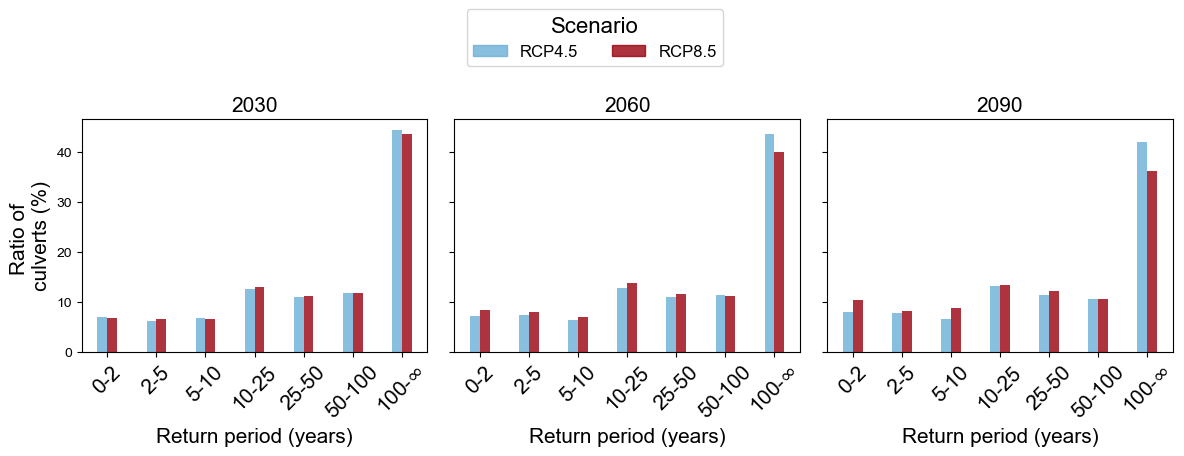

In [339]:
# Define the ordered classes and custom labels
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100','100-$∞$']
custom_labels = ordered_classes
# Time periods and RCP scenarios
scenarios = ['rcp45', 'rcp85']
scenario_labels = ['RCP4.5', 'RCP8.5']
times = ['2010-2039', '2040-2069', '2070-2099']
# Updated color palette: RCP4.5 (blue), RCP8.5 (dark red)
palette = ['#6baed6', '#99000d']
# Function to get normalized percentages
def get_percentages(columns):
    counts = [merged_culvert[col].value_counts().reindex(ordered_classes, fill_value=0) for col in columns]
    percentages = [(c / c.sum()) * 100 for c in counts]
    return percentages
# Gather percentage data for each time period
percentages_2030 = get_percentages([f'RP_class_c_2010-2039_{s}' for s in scenarios])
percentages_2060 = get_percentages([f'RP_class_c_2040-2069_{s}' for s in scenarios])
percentages_2090 = get_percentages([f'RP_class_c_2070-2099_{s}' for s in scenarios])
# Set up the plots
fig, axes = plt.subplots(1, 3, figsize=(4*3, 4), sharey=True)
fig.patch.set_facecolor('white')
x = np.arange(len(ordered_classes))
bar_width = 0.2
# Bar plotting function
def plot_bars(ax, percentages, title):
    for i, (percent, color) in enumerate(zip(percentages, palette)):
        ax.bar(x - 0.5 * bar_width + i * bar_width, percent, width=bar_width, 
               label=scenario_labels[i], color=color, alpha=0.8)
    ax.set_xticks(x)
    ax.set_xticklabels(custom_labels, rotation=45, ha='center', fontsize=15)
    ax.set_xlabel('Return period (years)', fontsize=15)
    ax.set_title(title, fontsize=15)
# Plotting each time slice
plot_bars(axes[0], percentages_2030, '2030')
plot_bars(axes[1], percentages_2060, '2060')
plot_bars(axes[2], percentages_2090, '2090')
# Add Y-axis label to the first plot
axes[0].set_ylabel('Ratio of \nculverts (%)', fontsize=15)
# Add legend above all plots
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i], alpha=0.8) for i in range(len(scenario_labels))]
fig.legend(handles, scenario_labels, title='Scenario',title_fontsize=16, loc='upper center', 
           bbox_to_anchor=(0.5, 1.15), ncol=2, fontsize=12, frameon=True)
# Final layout adjustments and save
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r'D:\culvert repo\Results\Figures\hist_returnperiods_percentages_rcp_scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

## Landuse and percipitation

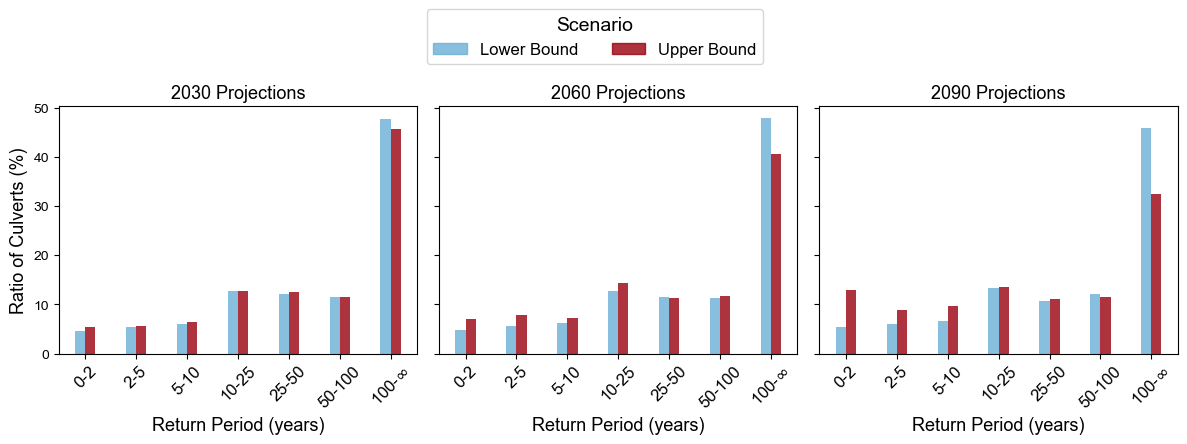

In [340]:
# Define RP class bins
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100', '100-$∞$']
custom_labels = ordered_classes

# Future years and scenarios
years = [2030, 2060, 2090]
scenarios = ['B2', 'A2']  # B2 = rcp45 (lower), A2 = rcp85 (upper)
scenario_labels = ['Lower Bound', 'Upper Bound']
palette = ['#6baed6', '#99000d']

# Function to calculate percentage histogram for a given year and scenario
def get_percentages(year, scenario):
    col = f'RP_class_c_{year}_{scenario}_lr'
    if col in merged_culvert.columns:
        counts = merged_culvert[col].value_counts().reindex(ordered_classes, fill_value=0)
        return (counts / counts.sum()) * 100
    else:
        return pd.Series([0]*len(ordered_classes), index=ordered_classes)

# Set up the figure with 3 subplots for the years
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
fig.patch.set_facecolor('white')
x = np.arange(len(ordered_classes))
bar_width = 0.2

# Bar plotting function for each year
def plot_bars(ax, year):
    for i, scenario in enumerate(scenarios):
        percent = get_percentages(year, scenario)
        ax.bar(
            x - 0.5 * bar_width + i * bar_width,
            percent,
            width=bar_width,
            label=scenario_labels[i],
            color=palette[i],
            alpha=0.8
        )
    ax.set_xticks(x)
    ax.set_xticklabels(custom_labels, rotation=45, ha='center', fontsize=12)
    ax.set_xlabel('Return Period (years)', fontsize=13)
    ax.set_title(f'{year} Projections', fontsize=13)

# Plot each year in its subplot
for ax, year in zip(axes, years):
    plot_bars(ax, year)

# Y-axis label only on first plot
axes[0].set_ylabel('Ratio of Culverts (%)', fontsize=13)

# Shared legend above all plots
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i], alpha=0.8) for i in range(len(scenario_labels))]
fig.legend(handles, scenario_labels, title='Scenario', title_fontsize=14,
           loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2, fontsize=12, frameon=True)

# Final layout and save
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r'D:\culvert repo\Results\Figures\hist_returnperiods_percentages_2040_2070_2100.png', dpi=300, bbox_inches='tight')
plt.show()

## Conditionals 

### Rain type

#### Histogram

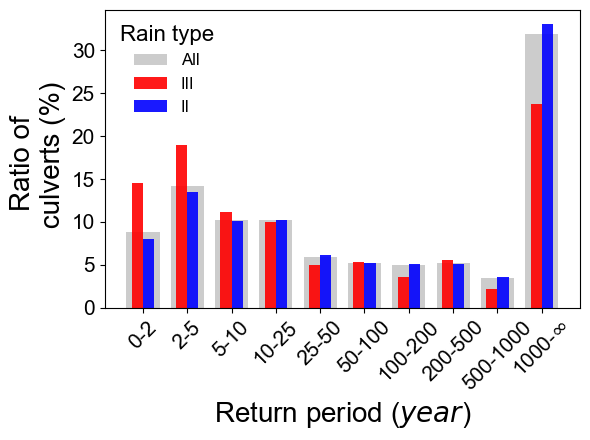

In [200]:
# Define ordered class labels
ordered_classes = ['0-2', '2-5', '5-10', '10-25', '25-50', '50-100', '100-200', '200-500', '500-1000', '1000-$∞$']
merged_culvert['RP_class_c'] = pd.Categorical(merged_culvert['RP_class_c'], categories=ordered_classes, ordered=True)

# Total number of culverts (for marginal)
total_all = len(merged_culvert)

# Marginal (overall) histogram
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100

# Conditional histograms
rain_types = merged_culvert['rain_type'].unique()
total_by_type = merged_culvert['rain_type'].value_counts()
colors = ['red', 'blue']

# X positions and bar widths
x = np.arange(len(ordered_classes))
marginal_width = 0.25*3
conditional_width = 0.25

# Initialize figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')

# Plot marginal histogram (background)
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')

# Plot conditional histograms by rain_type
for i, rain_type in enumerate(rain_types):
    subset = merged_culvert[merged_culvert['rain_type'] == rain_type]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / total_by_type[rain_type]) * 100
    bar_positions = x + (i - 0.5) * conditional_width  # Center the bars inside marginal
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{rain_type}', color=colors[i], alpha=0.9)

# Labels and formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.legend(title='Rain type', title_fontsize=16,fontsize=12, loc='upper left', frameon=False)

# Layout and save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_rain_type_with_marginal.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

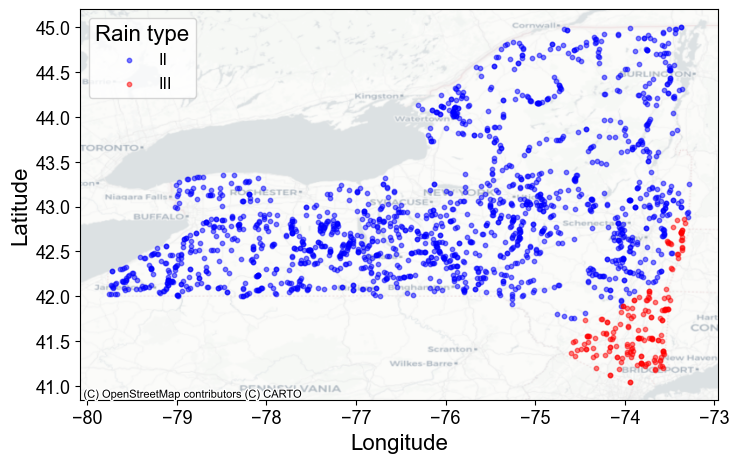

In [201]:
# Define rain type colors (consistent with histogram)
rain_type_colors = {
    'II': 'blue',
    'III': 'red'
}
# Create the figure and axis
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot culverts by rain_type
for rain_type, color in rain_type_colors.items():
    subset = gdf[gdf['rain_type'] == rain_type]
    if subset.empty:
        continue
    subset.plot(ax=ax, marker='o', color=color, markersize=10, label=f'{rain_type}', alpha=0.5)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Axis and legend formatting
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(
    title="Rain type",
    fontsize=12,
    title_fontsize=16,
    loc='upper left',
    frameon=True
)
# Finalize layout and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_rain_type_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Regions

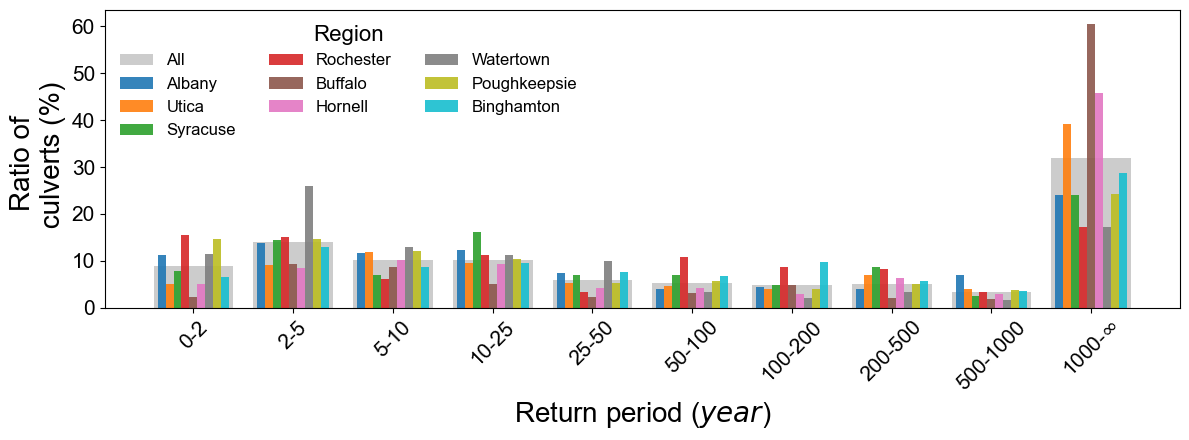

In [202]:
merged_culvert['RP_class_c'] = pd.Categorical(merged_culvert['RP_class_c'], categories=ordered_classes, ordered=True)
# Region label mapping
region_labels = {
    '1': 'Albany', '2': 'Utica', '3': 'Syracuse', '4': 'Rochester',
    '5': 'Buffalo', '6': 'Hornell', '7': 'Watertown', '8': 'Poughkeepsie',
    '9': 'Binghamton', '0': 'Hauppauge', 'N': 'New York City'
}
# Region label mapping
region_labels = {
    '1': 'Albany', '2': 'Utica', '3': 'Syracuse', '4': 'Rochester',
    '5': 'Buffalo', '6': 'Hornell', '7': 'Watertown', '8': 'Poughkeepsie',
    '9': 'Binghamton'}
# Filter only regions in the label map
regions = merged_culvert['REGION'].astype(str).isin(region_labels.keys())
merged_culvert = merged_culvert[regions].copy()
# Total (marginal) histogram
total_all = len(merged_culvert)
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100
# Compute totals by region
merged_culvert['REGION_STR'] = merged_culvert['REGION'].astype(str)
total_by_region = merged_culvert['REGION_STR'].value_counts()
# Use a few distinct colors
region_codes = sorted(merged_culvert['REGION_STR'].unique())
color_map = plt.cm.get_cmap('tab10', len(region_codes))  # up to 10 regions
# Plot setup
x = np.arange(len(ordered_classes))
marginal_width = 0.08*10
conditional_width = 0.08
fig, ax = plt.subplots(figsize=(4*3, 3*1.5))
fig.patch.set_facecolor('white')
# Plot marginal bar
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')
# Conditional bars by region
for i, region in enumerate(region_codes):
    region_df = merged_culvert[merged_culvert['REGION_STR'] == region]
    counts = region_df['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / total_by_region[region]) * 100
    bar_positions = x + (i - len(region_codes)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f"{region_labels.get(region, region)}",
           color=color_map(i), alpha=0.9)
# Axes and labels
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=15)
ax.tick_params(axis='y', labelsize=15)
# Legend
ax.legend(title='Region', title_fontsize=16,fontsize=12, loc='upper left', frameon=False, ncol=3)
# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_region_with_marginal.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

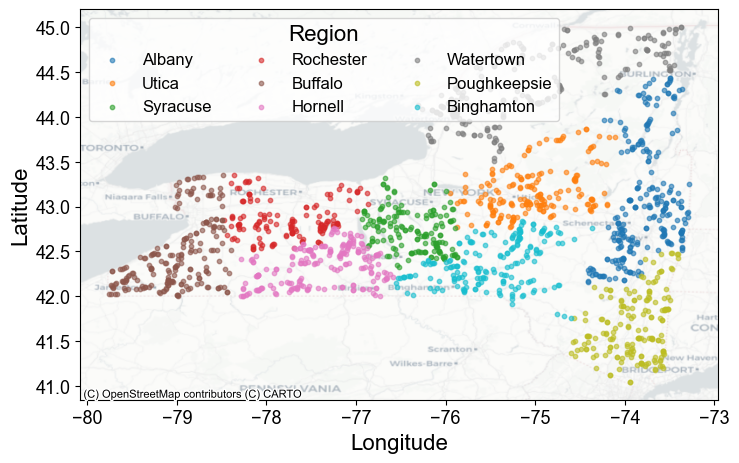

In [203]:
# Region label mapping
region_labels = {
    '1': 'Albany', '2': 'Utica', '3': 'Syracuse', '4': 'Rochester',
    '5': 'Buffalo', '6': 'Hornell', '7': 'Watertown', '8': 'Poughkeepsie',
    '9': 'Binghamton', '0': 'Hauppauge', 'N': 'New York City'
}
# Region label mapping
region_labels = {
    '1': 'Albany', '2': 'Utica', '3': 'Syracuse', '4': 'Rochester',
    '5': 'Buffalo', '6': 'Hornell', '7': 'Watertown', '8': 'Poughkeepsie',
    '9': 'Binghamton'}
# Filter only regions in the label map and convert to string
gdf['REGION_STR'] = gdf['REGION'].astype(str)
gdf = gdf[gdf['REGION_STR'].isin(region_labels.keys())]

# Get sorted region codes and color map
region_codes = sorted(gdf['REGION_STR'].unique())
color_map = plt.cm.get_cmap('tab10', len(region_codes))  # Consistent with histogram

# Create figure
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')

# Plot culverts by region
for i, region_code in enumerate(region_codes):
    subset = gdf[gdf['REGION_STR'] == region_code]
    region_name = region_labels.get(region_code, region_code)
    subset.plot(ax=ax, marker='o', color=color_map(i), markersize=10,
                label=f'{region_name}', alpha=0.6)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)

# Axis and legend formatting
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title="Region", fontsize=12, title_fontsize=16,
           loc='upper left', ncol=3, frameon=True)

# Finalize and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_regions_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Design type

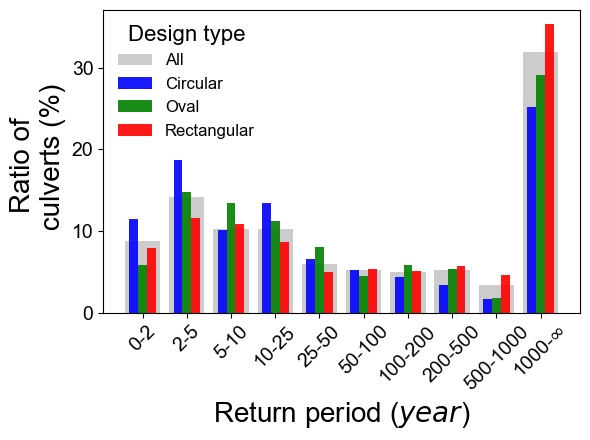

In [204]:
# Design type mapping
design_mapping = {
    41: 'Circular', 42: 'Circular',
    25: 'Oval', 26: 'Oval',
    40: 'Rectangular', 43: 'Rectangular'
}
# Map design types
merged_culvert['Design Category'] = merged_culvert['DESIGN TYPE'].map(design_mapping)
# Exclude unrecognized types from conditional plot
filtered_culvert = merged_culvert.dropna(subset=['Design Category'])
# Marginal histogram (all culverts including "Other Design Types")
total_all = len(merged_culvert)
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100
# Unique design categories and totals
design_categories = sorted(filtered_culvert['Design Category'].unique())
category_totals = filtered_culvert['Design Category'].value_counts()
# Plot setup
x = np.arange(len(ordered_classes))
marginal_width = 0.2*4
conditional_width = 0.2
color_map = {'Circular': 'blue', 'Oval': 'green', 'Rectangular': 'red'}
# Create figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Plot marginal histogram
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')
# Conditional histograms by design category
for i, design in enumerate(design_categories):
    subset = filtered_culvert[filtered_culvert['Design Category'] == design]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / category_totals[design]) * 100
    bar_positions = x + (i - len(category_totals)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{design}', color=color_map[design], alpha=0.9)
# Labels and formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Design type',title_fontsize=16, fontsize=12, loc='upper left', frameon=False)
# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_design_type.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

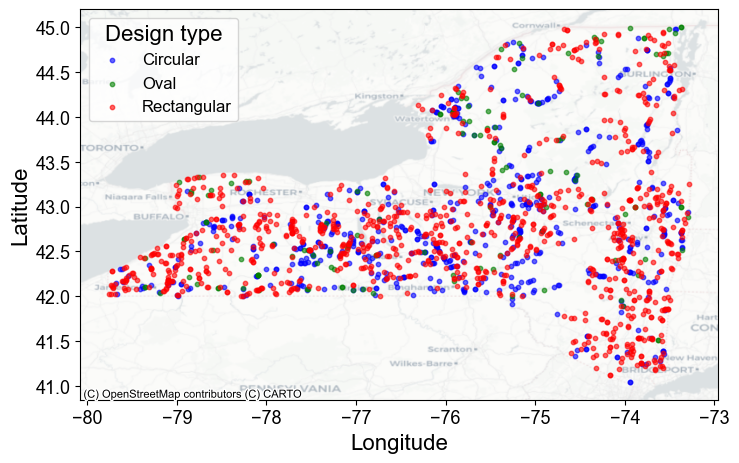

In [205]:
# Design type mapping
design_mapping = {
    41: 'Circular', 42: 'Circular',
    25: 'Oval', 26: 'Oval',
    40: 'Rectangular', 43: 'Rectangular'
}
gdf['Design Category'] = gdf['DESIGN TYPE'].map(design_mapping)
# Filter culverts with valid design category
gdf = gdf.dropna(subset=['Design Category'])
# Color map used in histogram
color_map = {'Circular': 'blue', 'Oval': 'green', 'Rectangular': 'red'}
# List design categories in consistent order
design_categories = sorted(gdf['Design Category'].unique())
# Create the figure
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot culverts by design category
for design in design_categories:
    subset = gdf[gdf['Design Category'] == design]
    subset.plot(ax=ax, marker='o', color=color_map[design], markersize=10,
                label=f'{design}', alpha=0.6)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Format axes and legend
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title="Design type", fontsize=12, title_fontsize=16,
           loc='upper left', frameon=True)
# Save and show
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_design_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Functional categories

In [210]:
excel_output_file = r"D:\culvert repo\data\rise\culvert dataframe  with height.xlsx"
culvert_func=pd.read_excel(excel_output_file)

In [ ]:
# Merge the two datasets on 'BIN'
merged_culvert = merged_culvert.merge(
    culvert_func[['BIN', 'FUNCTIONAL CLASSIFICATION']], 
    on='BIN', 
    how='inner'
)

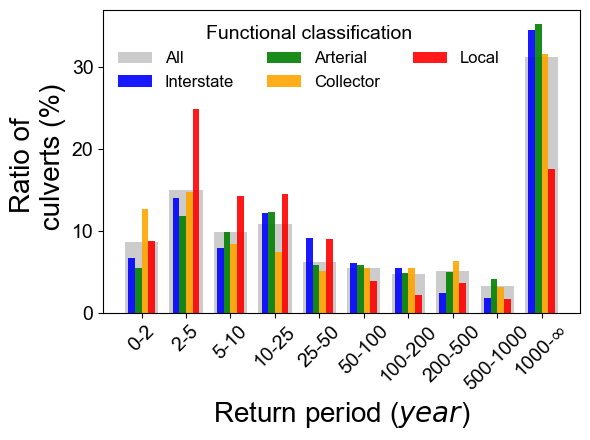

In [212]:
# Simplified functional class mapping
functional_class_mapping = {
    1: 'Interstate', 11: 'Interstate',
    2: 'Arterial', 6: 'Arterial', 12: 'Arterial', 14: 'Arterial', 16: 'Arterial',
    7: 'Collector', 8: 'Collector', 17: 'Collector',
    9: 'Local', 19: 'Local'
}
# Map and drop unclassified
merged_culvert['Functional Group'] = merged_culvert['FUNCTIONAL CLASSIFICATION'].map(functional_class_mapping)
filtered_culvert = merged_culvert.dropna(subset=['Functional Group'])
# Marginal histogram
total_all = len(filtered_culvert)
counts_marginal = filtered_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100
# Group-wise histogram setup
groups = ['Interstate', 'Arterial', 'Collector', 'Local']
group_totals = filtered_culvert['Functional Group'].value_counts()
x = np.arange(len(ordered_classes))
marginal_width = 0.15*5
conditional_width = 0.15
colors = ['blue', 'green', 'orange', 'red']  # Matching order of groups
# Plot
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Plot marginal bar (all culverts)
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')
# Plot each functional group
for i, group in enumerate(groups):
    subset = filtered_culvert[filtered_culvert['Functional Group'] == group]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / group_totals[group]) * 100
    bar_positions = x + (i - len(groups)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{group}',
           color=colors[i], alpha=0.9)
# Formatting
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title= 'Functional classification', title_fontsize=14, fontsize=12, loc='upper left',ncol=3, frameon=False)
# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_functional_group.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

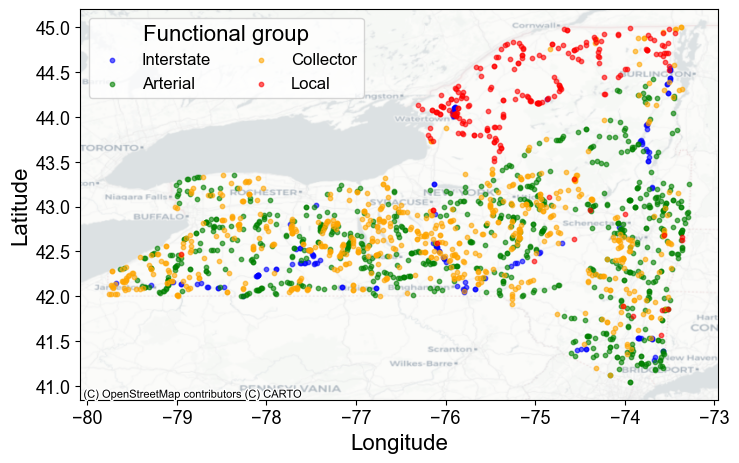

In [213]:
gdf = gdf.to_crs(epsg=4326)
# Simplified functional class mapping
functional_class_mapping = {
    1: 'Interstate', 11: 'Interstate',
    2: 'Arterial', 6: 'Arterial', 12: 'Arterial', 14: 'Arterial', 16: 'Arterial',
    7: 'Collector', 8: 'Collector', 17: 'Collector',
    9: 'Local', 19: 'Local'
}
# Map to Functional Group
gdf['Functional Group'] = gdf['FUNCTIONAL CLASSIFICATION'].map(functional_class_mapping)
# Filter valid functional groups only
gdf = gdf.dropna(subset=['Functional Group'])
# Define consistent colors (same as histogram)
color_map = {
    'Interstate': 'blue',
    'Arterial': 'green',
    'Collector': 'orange',
    'Local': 'red'
}
# Functional groups in display order
groups = ['Interstate', 'Arterial', 'Collector', 'Local']
# Plot map
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot each group with assigned color
for group in groups:
    subset = gdf[gdf['Functional Group'] == group]
    subset.plot(ax=ax, marker='o', color=color_map[group], markersize=10,
                label=f'{group}', alpha=0.6)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Axes and legend formatting
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title="Functional group", fontsize=12, title_fontsize=16,
           loc='upper left', ncol=2, frameon=True)
# Final layout and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_functional_group_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Year built

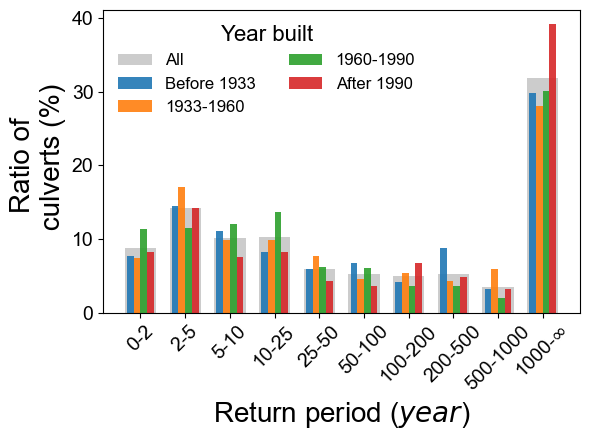

In [214]:
# Bin 'YEAR BUILT' into 4 periods
bins = [0, 1933, 1960, 1990, 2025]
labels = ['Before 1933', '1933-1960', '1960-1990', 'After 1990']
merged_culvert['year_built_class'] = pd.cut(merged_culvert['YEAR BUILT'], bins=bins, labels=labels, include_lowest=True)
# Drop rows with missing year_built_class
filtered_culvert = merged_culvert.dropna(subset=['year_built_class'])
# Marginal histogram (all culverts)
total_all = len(merged_culvert)
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100
# Year class categories and totals
year_classes = labels  # Preserves order
year_totals = filtered_culvert['year_built_class'].value_counts()
# Plot setup
x = np.arange(len(ordered_classes))
marginal_width = 0.7
conditional_width = 0.15
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
# Create figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Plot marginal bars
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')
# Plot conditional bars by year built class
for i, year_class in enumerate(year_classes):
    subset = filtered_culvert[filtered_culvert['year_built_class'] == year_class]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / year_totals[year_class]) * 100
    bar_positions = x + (i - len(year_classes)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{year_class}', color=colors[i], alpha=0.9)
# Axes and legend
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title= 'Year built', title_fontsize= 16, fontsize=12, loc='upper left', ncol=2, frameon=False)
# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_year_built.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

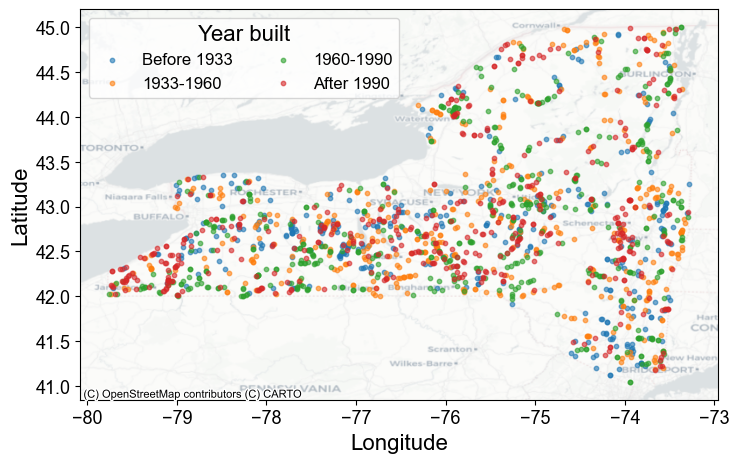

In [215]:
gdf = gdf.to_crs(epsg=4326)
# Bin YEAR BUILT into 4 classes
bins = [0, 1933, 1960, 1990, 2025]
labels = ['Before 1933', '1933-1960', '1960-1990', 'After 1990']
gdf['year_built_class'] = pd.cut(gdf['YEAR BUILT'], bins=bins, labels=labels, include_lowest=True)
# Drop rows with missing classification
gdf = gdf.dropna(subset=['year_built_class'])
# Define consistent colors (same as histogram)
color_map = {
    'Before 1933': '#1f77b4',     # Blue
    '1933-1960': '#ff7f0e',       # Orange
    '1960-1990': '#2ca02c',       # Green
    'After 1990': '#d62728'       # Red
}
# Plot map
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot culverts by year built class
for label in labels:
    subset = gdf[gdf['year_built_class'] == label]
    subset.plot(ax=ax, marker='o', color=color_map[label], markersize=10,
                label=label, alpha=0.6)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Format axes and legend
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title="Year built", fontsize=12, title_fontsize=16,
           loc='upper left', ncol=2, frameon=True)
# Save and show
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_year_built_map.png', dpi=300, bbox_inches='tight')
plt.show()

### Drainage area

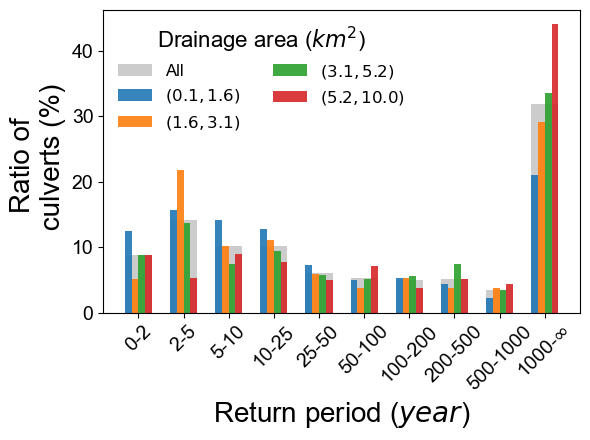

In [216]:
# Bin Area into 4 quantiles
area_class, bins = pd.qcut(merged_culvert['Area'], q=4, retbins=True)
# Create readable labels from bin edges
labels = [
    rf"$({bins[i]/1e6:.1f}, {bins[i+1]/1e6:.1f}) $"
    for i in range(len(bins)-1)
]
# Assign labeled categories
merged_culvert['area_class'] = pd.qcut(merged_culvert['Area'], q=4, labels=labels)
# Filter for plotting
filtered_culvert = merged_culvert.dropna(subset=['area_class'])
# Marginal histogram
total_all = len(merged_culvert)
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100
# Area classes and totals
area_classes = filtered_culvert['area_class'].cat.categories
area_totals = filtered_culvert['area_class'].value_counts()
# Plot setup
x = np.arange(len(ordered_classes))
marginal_width = 0.6
conditional_width = 0.15
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red
# Create figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')
# Plot marginal bars
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')
# Plot conditional bars by area bin
for i, area_class in enumerate(area_classes):
    subset = filtered_culvert[filtered_culvert['area_class'] == area_class]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / area_totals[area_class]) * 100
    bar_positions = x + (i - len(area_classes)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{area_class}', color=colors[i], alpha=0.9)
# Axes and legend
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title= f'Drainage area ($km^2$)', title_fontsize=16, fontsize=12, ncol=2, loc='upper left', frameon=False)
# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_drainage_area_4bins.png", dpi=300, bbox_inches='tight')
plt.show()

#### Maps

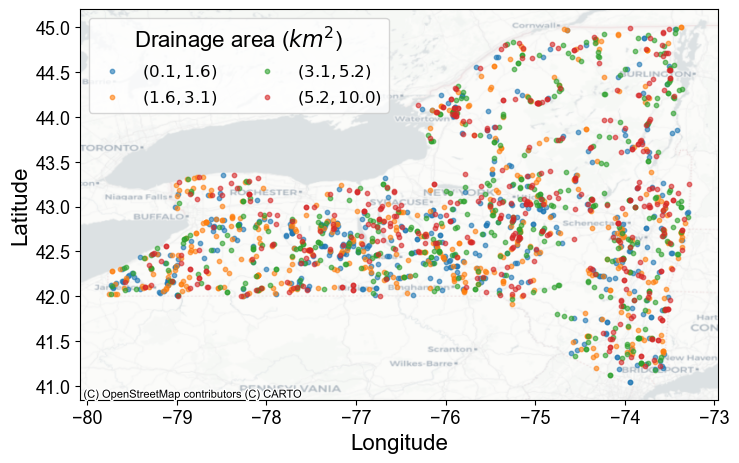

In [217]:
# Assign labels
gdf['area_class'] = pd.qcut(gdf['Area'], q=4, labels=labels)
# Drop missing (should be none, but safe)
gdf = gdf.dropna(subset=['area_class'])
# Define matching color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
color_map = dict(zip(labels, colors))
# Plot map
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot culverts by area class
for label in labels:
    subset = gdf[gdf['area_class'] == label]
    subset.plot(ax=ax, marker='o', color=color_map[label], markersize=10,
                label=label, alpha=0.6)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Format axes and legend
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title=f'Drainage area ($km^2$)', ncol=2, fontsize=12, title_fontsize=16,
           loc='upper left',  frameon=True)
# Final layout and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_area_class_map.png', dpi=300, bbox_inches='tight')
plt.show()

###  Slope

#### Histogram

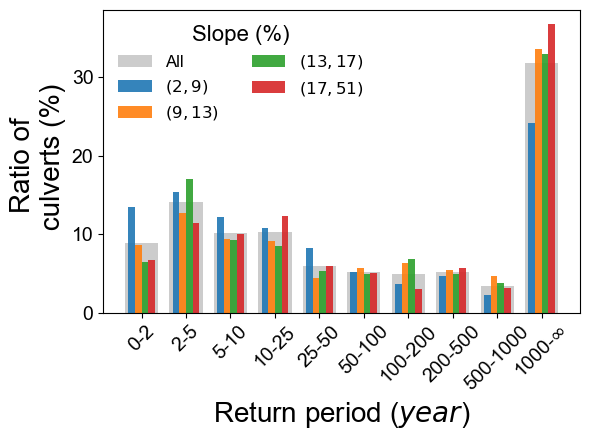

In [218]:
# Bin slope into 4 quantiles
slope_class, bins = pd.qcut(merged_culvert['Bas_S'], q=4, retbins=True)
# Create readable labels from bin edges
labels = [
    rf"$({bins[i]:.0f}, {bins[i+1]:.0f})$"
    for i in range(len(bins)-1)
]
# Assign labeled categories
merged_culvert['slope_class'] = pd.qcut(merged_culvert['Bas_S'], q=4, labels=labels)

# Filter for plotting
filtered_culvert = merged_culvert.dropna(subset=['slope_class'])

# Marginal distribution (all culverts)
total_all = len(merged_culvert)
counts_marginal = merged_culvert['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
percent_marginal = (counts_marginal / total_all) * 100

# Slope classes and totals
slope_classes = filtered_culvert['slope_class'].cat.categories
slope_totals = filtered_culvert['slope_class'].value_counts()

# Plot setup
x = np.arange(len(ordered_classes))
marginal_width = 0.15*5
conditional_width = 0.15
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # blue, orange, green, red

# Create figure
fig, ax = plt.subplots(figsize=(4*1.5, 3*1.5))
fig.patch.set_facecolor('white')

# Plot marginal bars
ax.bar(x, percent_marginal, width=marginal_width, color='gray', alpha=0.4, label='All')

# Plot conditional bars by slope bin
for i, slope_class in enumerate(slope_classes):
    subset = filtered_culvert[filtered_culvert['slope_class'] == slope_class]
    counts = subset['RP_class_c'].value_counts().reindex(ordered_classes).fillna(0)
    percent = (counts / slope_totals[slope_class]) * 100
    bar_positions = x + (i - len(slope_classes)/2 +0.5) * conditional_width
    ax.bar(bar_positions, percent, width=conditional_width,
           label=f'{slope_class}', color=colors[i], alpha=0.9)

# Axes and legend
ax.set_xlabel('Return period ($year$)', fontsize=20)
ax.set_ylabel('Ratio of \n culverts (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(ordered_classes, rotation=45, ha='center', fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Slope (%)', title_fontsize=16, ncol=2, fontsize=12, loc='upper left', frameon=False)

# Save
plt.tight_layout()
plt.savefig(r"D:\culvert repo\Results\Figures\RP_his_by_slope_4bins.png", dpi=300, bbox_inches='tight')
plt.show()

#### Map

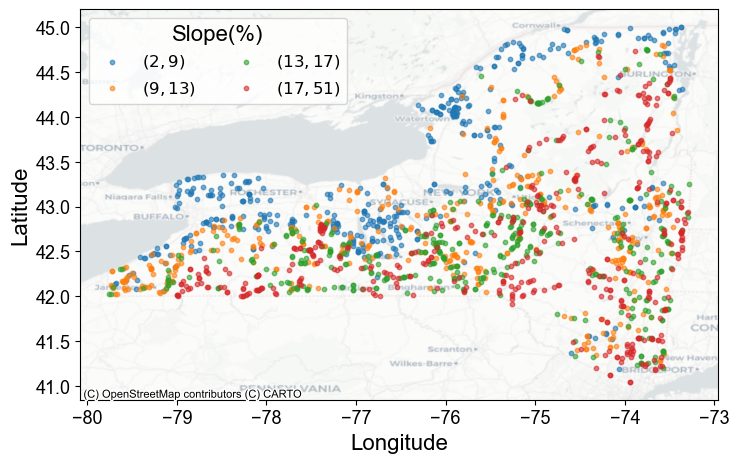

In [219]:
# Assign labels
gdf['slope_class'] = pd.qcut(gdf['Bas_S'], q=4, labels=labels)
# Drop missing (should be none, but safe)
gdf = gdf.dropna(subset=['slope_class'])
# Define matching color map
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
color_map = dict(zip(labels, colors))
# Plot map
fig, ax = plt.subplots(figsize=(3*2.5, 4*2.5))
fig.patch.set_facecolor('white')
# Plot culverts by area class
for label in labels:
    subset = gdf[gdf['slope_class'] == label]
    subset.plot(ax=ax, marker='o', color=color_map[label], markersize=10,
                label=label, alpha=0.6)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, crs=gdf.crs.to_string(), alpha=0.8)
# Format axes and legend
ax.set_xlabel('Longitude', fontsize=16)
ax.set_ylabel('Latitude', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
plt.legend(title=f"Slope(%)", ncol=2, fontsize=12, title_fontsize=16,
           loc='upper left', frameon=True)
# Final layout and save
plt.tight_layout()
plt.savefig(r'D:\culvert repo\Results\Figures\culvert_area_class_map.png', dpi=300, bbox_inches='tight')
plt.show()

## Website map

In [ ]:
all_watersheds = []
root_dir = r'D:\culvert repo\Results\waterhsed_delineation_dir'
pattern = os.path.join(root_dir, '**', '*watershed_poly_*m.shp')
shapefile_paths = glob.glob(pattern, recursive=True)
# Print the number of shapefiles found
print(f"Found {len(shapefile_paths)} shapefiles.")
# Define function to select closest area (customize as needed)
def select_closest_area(row):
    error = str(row['Closest_Area'])
    return error    
# Calculate map center
map_center = [gdf['Ini_lat'].mean(), gdf['Ini_lon'].mean()]
# Initialize Folium map
culvert_map = folium.Map(location=map_center, zoom_start=10)
# Define return period class to color mapping
class_colors = {
    '0-2': 'darkred',
    '2-5': 'firebrick',
    '5-10': 'indianred',
    '10-25': 'tomato',
    '25-50': 'orangered',
    '50-100': 'orange',
    '100-200': 'goldenrod',
    '200-500': 'royalblue',
    '500-1000': 'dodgerblue',
    '1000-$∞$': 'darkblue'
}
# Columns to plot (column, display name)
rp_columns = [
    ('RP_class', 'Overtopping capacity'),
    ('RP_class_c', 'Structural damage capacity'),
    ('RP_class_c_LL', 'Hydrologic Q Upper Bound'),
    ('RP_class_c_UL', 'Hydrologic Q Lower Bound'),
    ('RP_class_c_nor', 'ASM Normal'),
    ('RP_class_c_dry', 'ASM Dry'),
]
# Initialize base map
map_center = [merged_culvert['Ini_lat'].mean(), merged_culvert['Ini_lon'].mean()]
culvert_map = folium.Map(location=map_center, zoom_start=7, control_scale=True)
# Loop over each RP class column
for column, label in rp_columns:
    fg = folium.FeatureGroup(name=label, show=False)  # show=True for default visible
    for _, row in merged_culvert.iterrows():
        rp_class = row[column]
        color = class_colors.get(rp_class, 'gray')
        folium.CircleMarker(
            location=(row['Ini_lat'], row['Ini_lon']),
            radius=5,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=folium.Popup(f"BIN: {row['BIN']}<br>{label}: {rp_class}", parse_html=True)
        ).add_to(fg)
    fg.add_to(culvert_map)
# Create a FeatureGroup to combine all watersheds into one layer
watershed_group = folium.FeatureGroup(name="All Watersheds").add_to(culvert_map)
# Iterate over each row in the gdf to plot watershed boundaries
for idx, row in tqdm(gdf.iterrows(), total=gdf.shape[0], desc='Processing watersheds'):
    error = select_closest_area(row)
    # Construct the specific filename pattern
    specific_pattern = f"{gdf['BIN'].iloc[idx]}watershed_poly_{error}m.shp"    
    # Find the path related to the specific pattern
    matching_path = None
    for path in shapefile_paths:
        if specific_pattern in os.path.basename(path):
            matching_path = path
            break
    if matching_path is None:
        print(f"No matching shapefile found for {specific_pattern}.")
        continue
    # Read the watershed shapefile
    watershed = gpd.read_file(matching_path)
    watershed = watershed.to_crs(epsg=4326)  # Transform to WGS84 CRS
    watershed['BIN']= gdf['BIN'].iloc[idx]
    all_watersheds.append(watershed)
    watershed['geometry'] = watershed['geometry'].simplify(0.00005, preserve_topology=True)
    # Convert the watershed boundary to GeoJSON-like format for Folium plotting
    for _, feature in watershed.iterrows():
        geom = feature['geometry']
        bin_value = feature['BIN']  # Extract BIN value for this watershed
        # Plot the watershed boundary as a GeoJSON overlay
        folium.GeoJson(
            geom,
            style_function=lambda x: {
                'fillColor': 'gray', 
                'fillOpacity': random.uniform(0, 1), 
                'color': 'blue', 
                'weight': 2
            },
            popup=folium.Popup(f"BIN: {bin_value}", parse_html=True)  # Fix BIN popup reference
        ).add_to(watershed_group)
# Merge all watershed GeoDataFrames
merged_watersheds = gpd.GeoDataFrame(pd.concat(all_watersheds, ignore_index=True), crs='EPSG:4326')
# Save to shapefile
merged_watersheds.to_file(r'D:\culvert repo\Results\waterhsed_delineation_dir\all_watersheds_combined.shp')
# Add the NYS boundary (assuming you've downloaded the NYS shapefile)
nys_boundary_path = r"D:\culvert repo\data\initial layers\state_5070.shp"  # Replace with the actual path to the NYS boundary shapefile
nys_boundary = gpd.read_file(nys_boundary_path)
nys_boundary = nys_boundary.to_crs(epsg=4326)  # Transform to WGS84 CRS
nys_boundary = nys_boundary.applymap(lambda x: x.isoformat() if isinstance(x, pd.Timestamp) else x)
folium.GeoJson(
    nys_boundary,
    name="New York State Boundary",  
    style_function=lambda x: {'fillColor': 'none', 'color': 'black', 'weight': 3},
    popup="New York State boundary"
).add_to(culvert_map)
# DOT regions
# Add the NYS boundary (assuming you've downloaded the NYS shapefile)
nys_region_path = r"D:\culvert repo\data\initial layers\DOT_Regions.shp"  
nys_region = gpd.read_file(nys_region_path)
nys_region = nys_region.to_crs(epsg=4326)  # Transform to WGS84 CRS
nys_region = nys_region.applymap(lambda x: x.isoformat() if isinstance(x, pd.Timestamp) else x)
folium.GeoJson(
    nys_region,
    name="New York State Regions",
    style_function=lambda x: {'fillColor': 'none', 'color': 'gray', 'weight': 1},
    popup=folium.GeoJsonPopup(fields=["OFFICE_SIT"]) 
).add_to(culvert_map)
# Add basemap and layers
folium.TileLayer('CartoDB Positron').add_to(culvert_map)
folium.TileLayer(
    tiles="https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}",
    attr="ESRI Topo",
    name="ESRI Topographic",
    control=True
).add_to(culvert_map)
# USGS Hydrography (Shows Streams and Water Bodies)
folium.TileLayer(
    tiles="https://basemap.nationalmap.gov/arcgis/rest/services/USGSHydroCached/MapServer/tile/{z}/{y}/{x}",
    attr="USGS Hydrography",
    name="USGS Hydrography"
).add_to(culvert_map)
folium.TileLayer(
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='ESRI',
    name='ESRI Satellite',
    max_zoom=100,
    control=True
).add_to(culvert_map)
# Add NEXRAD Weather Radar WMS Layer
folium.WmsTileLayer(
    url="https://mesonet.agron.iastate.edu/cgi-bin/wms/nexrad/n0r.cgi",
    name="NEXRAD Radar",
    fmt="image/png",
    layers="nexrad-n0r-900913",
    attr="Weather data © 2012 IEM Nexrad",
    transparent=True,
    overlay=True,
    control=True
).add_to(culvert_map)
folium.LayerControl().add_to(culvert_map)
# HTML attribution banner (no macro)
attribution_html = Element("""
<div style="
    position: fixed;
    top: 0px;
    left: 0px;
    width: 100%;
    background-color: white;
    text-align: center;
    font-size: 14px;
    font-family: Arial, sans-serif;
    z-index:9999;
    padding: 8px 0;
    border-bottom: 1px solid #ccc;
    box-shadow: 0 2px 6px rgba(0,0,0,0.1);
">
    Developed by <a href="https://www.omidemam.com/" target="_blank">Omid Emamjomehzadeh</a>,
    supervised by <a href="https://engineering.nyu.edu/faculty/omar-wani" target="_blank">Dr. Omar Wani</a> at 
    <a href="https://www.omarwani.com/" target="_blank">Hydrologic Systems Group @NYU</a>
</div>
""")
# Add the banner to the map
culvert_map.get_root().html.add_child(attribution_html)
# Save and display the map
culvert_map.save(r'D:\culvert repo\Results\Figures\culvert_return_periods_map_with_watersheds.html')
culvert_map

In [220]:
# Date and time
now = datetime.datetime.now()
print(f"Date and time: {now}")

Date and time: 2025-05-15 10:31:10.746117


In [221]:
%load_ext watermark
# Print the Python version and some dependencies
%watermark -v -m -p numpy,pandas,geopandas,matplotlib,seaborn,os,rasterio,tqdm,scipy,contextily,folium,shapely,tqdm,branca

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.20.0

numpy     : 2.0.2
pandas    : 2.2.2
geopandas : 1.0.1
matplotlib: 3.8.4
seaborn   : 0.13.2
os        : unknown
rasterio  : 1.4.3
tqdm      : 4.66.5
scipy     : 1.13.1
contextily: 1.6.1
folium    : 0.17.0
shapely   : 2.0.7
branca    : 0.7.2

Compiler    : MSC v.1940 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
CPU cores   : 24
Architecture: 64bit

